# Social Media Sentiment Analysis

The goal of this project is to analyze and interpret the sentiment of social media data to gain insights into public opinions, brand perception, or market trends. This involves extracting, processing, and analyzing textual data from social media platforms to classify sentiments as positive, negative, or neutral.

<img src="https://www.conceptstadium.com/wp/wp-content/uploads/2020/02/Blog-Post-Lorraine.jpg" 
alt="amazon" width=1000 height=800>

## About the Dataset

The dataset generally consists of social media posts, comments, or reviews labeled with sentiment categories such as positive, negative, or neutral.

|Feature|	Description|
|-------|---------------|
|Text|	User-generated content showcasing sentiments|
|Sentiment	|Categorized emotions|
|Timestamp	|Date and time information|
|User	|Unique identifiers of users contributing|
|Platform|	Social media platform where the content originated|
|Hashtags|	Identifies trending topics and themes|
|Likes	|Quantifies user engagement (likes)|
|Retweets|	Reflects content popularity (retweets)|
|Country|	Geographical origin of each post|
|Year	|Year of the post|
|Month	|Month of the post|
|Day	|Day of the post|
|Hour	|Hour of the post|

## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import word_tokenize

nltk.download('vader_lexicon')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gunja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Dataset

You can download this dataset from Kaggle. Here is the link: 'https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset'

In [12]:
#load data 
df=pd.read_csv(r"C:\Users\gunja\Downloads\sentimentdataset.csv")

## Data Wrangling

In [14]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [15]:
df.shape

(732, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [17]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [18]:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

## Data Cleaning

In [20]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [23]:
df = df.drop(columns=['Unnamed: 0.1', 'Hour'])

In [24]:
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [26]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['Month'] = df['Month'].map(month_mapping)
df['Month'] = df['Month'].astype('object')

In [27]:
df = df.drop(columns=['Timestamp'])

In [28]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()
df['Retweets']= df['Retweets'].astype(int)
df['Likes']= df['Likes'].astype(int)

In [29]:
df.dtypes

Id            int64
Text         object
Sentiment    object
User         object
Platform     object
Hashtags     object
Retweets      int32
Likes         int32
Country      object
Year          int32
Month        object
Day           int32
dtype: object

In [30]:
df.head()

,Id,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day
0,0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,January,15
1,1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,January,15
2,2,Just finished an amazing workout! 💪,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,January,15
3,3,Excited about the upcoming weekend getaway!,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,January,15
4,4,Trying out a new recipe for dinner tonight.,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,January,15


## Exploratory Data Analysis (EDA)

In [32]:
print("Total no of users :",len(np.unique(df.User)))
print("Total No of sentiments  :", len(np.unique(df.Sentiment)))
print("Total No of countries :", len(np.unique(df.Country)))

Total no of users : 670
Total No of sentiments  : 191
Total No of countries : 33


In [33]:
print('Minimum retweet is: %d' %(df.Retweets.min()))
print('Maximum retweet is: %d' %(df.Retweets.max()))

Minimum retweet is: 5
Maximum retweet is: 40


In [34]:
print('Minimum like is: %d' %(df.Likes.min()))
print('Maximum like is: %d' %(df.Likes.max()))

Minimum like is: 10
Maximum like is: 80


#### Platform Distribution Counts

In [36]:
platform_counts=df['Platform'].value_counts()
platform_counts

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

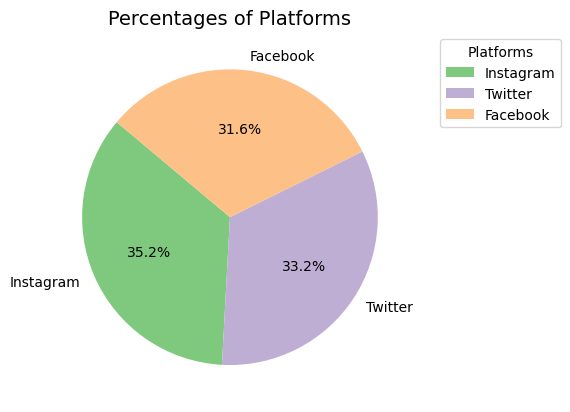

In [37]:
platform_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Accent.colors)
plt.title('Percentages of Platforms', fontsize=14)
plt.ylabel('')  # Hide the y-label
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

#### Top 10 Sentiments

In [39]:
top_sentiments=df['Sentiment'].value_counts().nlargest(10)
top_sentiments

Sentiment
Positive       45
Joy            44
Excitement     37
Contentment    19
Neutral        18
Gratitude      18
Curiosity      16
Serenity       15
Happy          14
Nostalgia      11
Name: count, dtype: int64

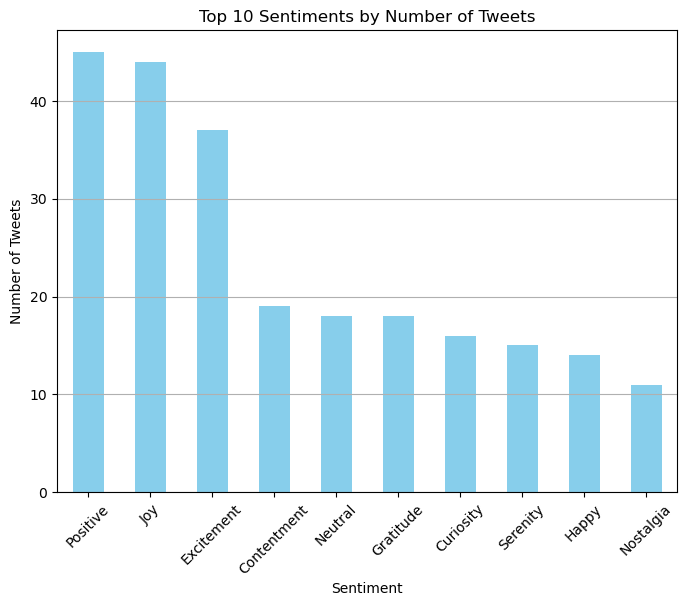

In [40]:
plt.figure(figsize=(8, 6))
top_sentiments.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sentiments by Number of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Annual Tweet Volume Analysis

In [42]:
print('Minimum Year is: %d' %(df.Year.min()))
print('Maximum Year is: %d' %(df.Year.max()))

Minimum Year is: 2010
Maximum Year is: 2023


In [43]:
tweets_per_year=df.groupby('Year').size().sort_values(ascending=False).reset_index(name='count')
tweets_per_year

,Year,count
0,2023,289
1,2019,73
2,2020,69
3,2021,63
4,2022,63
5,2018,56
6,2017,43
7,2016,38
8,2015,19
9,2011,4


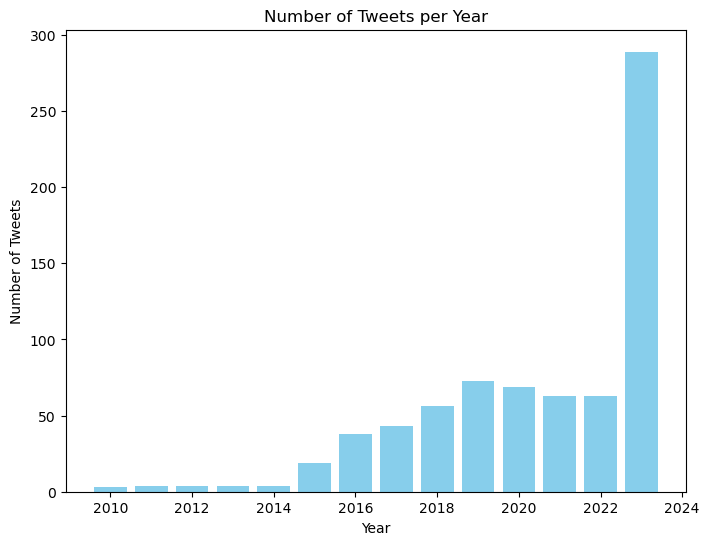

In [44]:
plt.figure(figsize=(8, 6))
plt.bar(tweets_per_year['Year'], tweets_per_year['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Year')
plt.show()

In [45]:
tweets_per_month=df.groupby('Month').size().sort_values(ascending=False).reset_index(name='count')
tweets_per_month

,Month,count
0,February,85
1,January,82
2,August,78
3,September,77
4,June,71
5,July,62
6,April,51
7,November,49
8,October,48
9,May,46


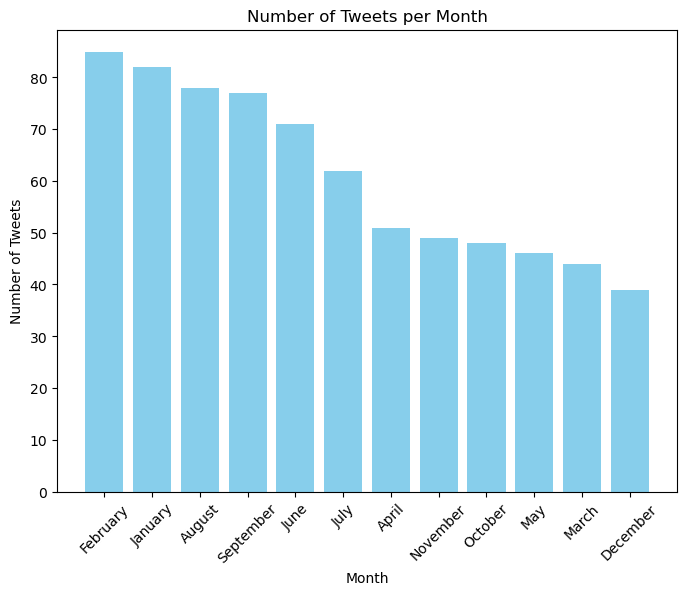

In [46]:
plt.figure(figsize=(8, 6))
plt.bar(tweets_per_month['Month'], tweets_per_month['count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Month')
plt.xticks(rotation=45)
plt.show()

#### Top Most Tweeted Countries

In [48]:
most_tweeted_country=df['Country'].value_counts().sort_values(ascending=False).head(10)
most_tweeted_country

Country
USA          188
UK           143
Canada       135
Australia     75
India         70
Brazil        17
France        16
Japan         15
Germany       14
Italy         11
Name: count, dtype: int64

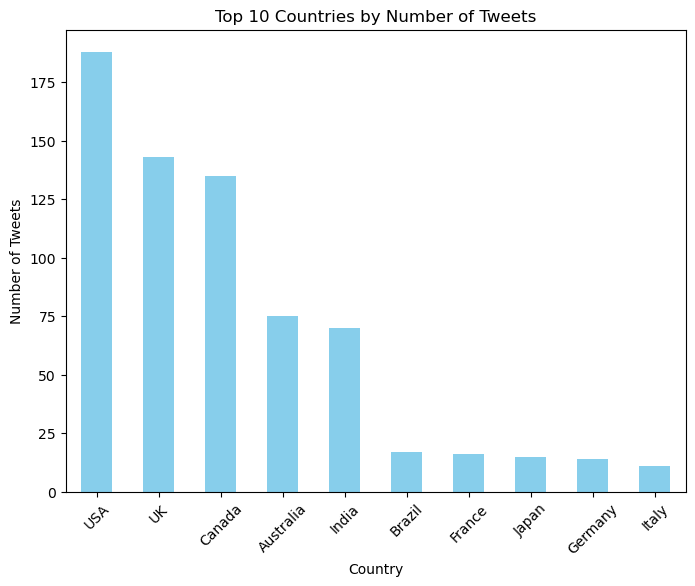

In [49]:
plt.figure(figsize=(8, 6))
most_tweeted_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Tweets')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

#### Top Most Frequent Hashtags

In [51]:
hashtags_series = df['Hashtags'].dropna()
# Split hashtags by spaces if they are in a single string or by comma if separated
hashtags = hashtags_series.str.split(expand=True).stack()
# Counting the frequency of each hashtag
hashtag_counts = hashtags.value_counts()
# Getting the top 10 most frequent hashtags
top_10_hashtags = hashtag_counts.head(10)
top_10_hashtags

#Serenity       15
#Excitement     13
#Gratitude      13
#Despair        11
#Nostalgia      11
#Curiosity      10
#Contentment    10
#Hopeful         9
#Grief           9
#Awe             9
Name: count, dtype: int64

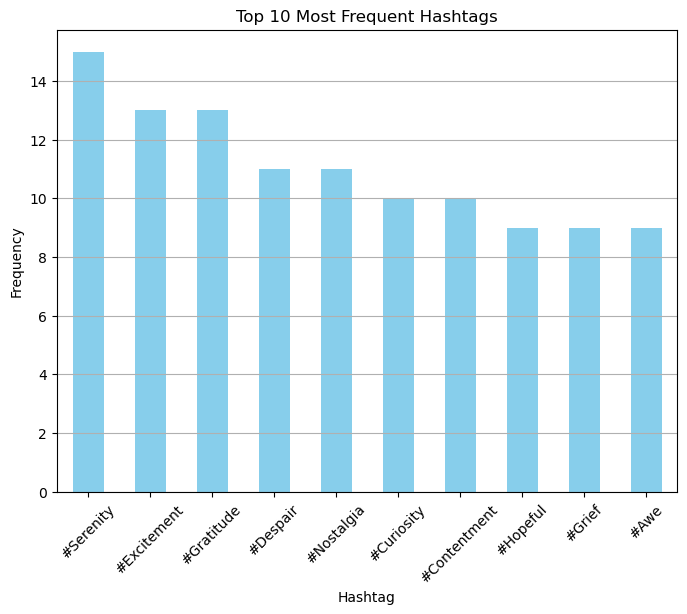

In [52]:
plt.figure(figsize=(8, 6))
top_10_hashtags.plot(kind='bar', color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Hashtags')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Text Preprocessing

In [54]:
#Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    # Remove URLs and text within brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)
    # Replace newlines with spaces and remove extra spaces
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text.strip())
    # Remove non-ASCII characters (if necessary)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r"'s\b", '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Define symbols to be removed
    symbols = set(string.punctuation)
    # Process tokens: remove stopwords and symbols, but preserve complete words
    cleaned_tokens = [token for token in tokens 
                      if token not in stop_words and token not in symbols]
    # Reconstruct cleaned text
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text
# Apply the cleaning function
df["Clean_Text"] = df["Text"].apply(clean)

In [55]:
df["Clean_Text"].values

array(['enjoying beautiful day park', 'traffic terrible morning',
       'finished amazing workout', 'excited upcoming weekend getaway',
       'trying new recipe dinner tonight',
       'feeling grateful little things life',
       'rainy days call cozy blankets hot cocoa',
       'new movie release must-watch',
       'political discussions heating timeline',
       'missing summer vibes beach days', 'published new blog post check',
       'feeling bit weather today', 'exploring city hidden gems',
       'new year new fitness goals', 'technology changing way live',
       'reflecting past looking ahead', 'adopted cute furry friend',
       'late-night gaming session friends',
       'attending virtual conference ai', 'winter blues got feeling low',
       'sipping coffee enjoying good book',
       'exploring world virtual reality',
       'productive day ticking to-do list',
       'finished challenging workout routine',
       'celebrating milestone work', 'sunday brunch friends',


In [56]:
df1=df.copy()

In [57]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Calculate the sentiment scores using the VADER analyzer
df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
# Determine sentiment based on the compound score
df1['Sentiment'] = df1['Vader_Score'].apply(
    lambda score: 'positive' if score >= 0.05 
    else ('negative' if score <= -0.05 
          else 'neutral'))
print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head(10))

                                Clean_Text  Vader_Score Sentiment
0              enjoying beautiful day park       0.8074  positive
1                 traffic terrible morning      -0.4767  negative
2                 finished amazing workout       0.5859  positive
3         excited upcoming weekend getaway       0.3400  positive
4         trying new recipe dinner tonight       0.0000   neutral
5      feeling grateful little things life       0.5423  positive
6  rainy days call cozy blankets hot cocoa      -0.0772  negative
7             new movie release must-watch       0.0000   neutral
8   political discussions heating timeline       0.0000   neutral
9          missing summer vibes beach days      -0.2960  negative


### Sentiment Analysis

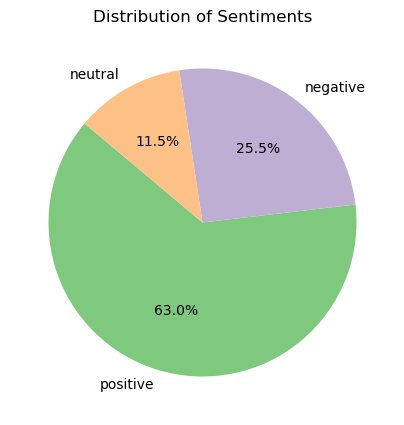

In [59]:
sentiment_counts = df1['Sentiment'].value_counts()
plt.figure(figsize=(5, 5)) 
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Accent.colors)
plt.title('Distribution of Sentiments')
plt.show()

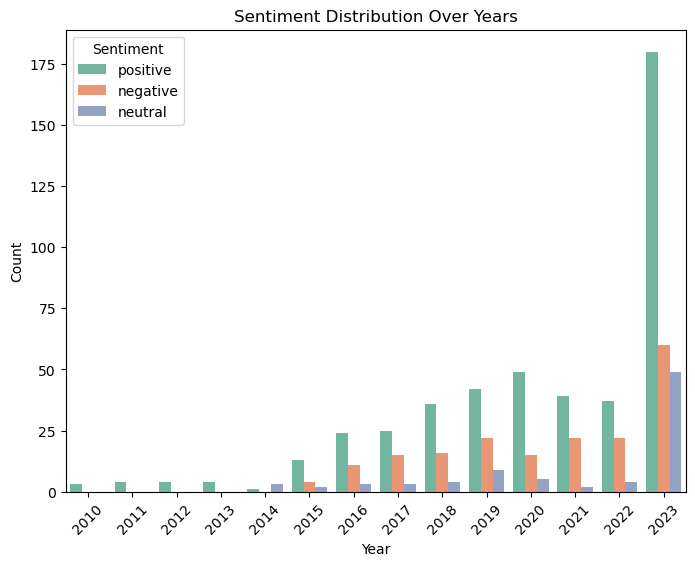

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Set2')  
plt.title('Sentiment Distribution Over Years') 
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

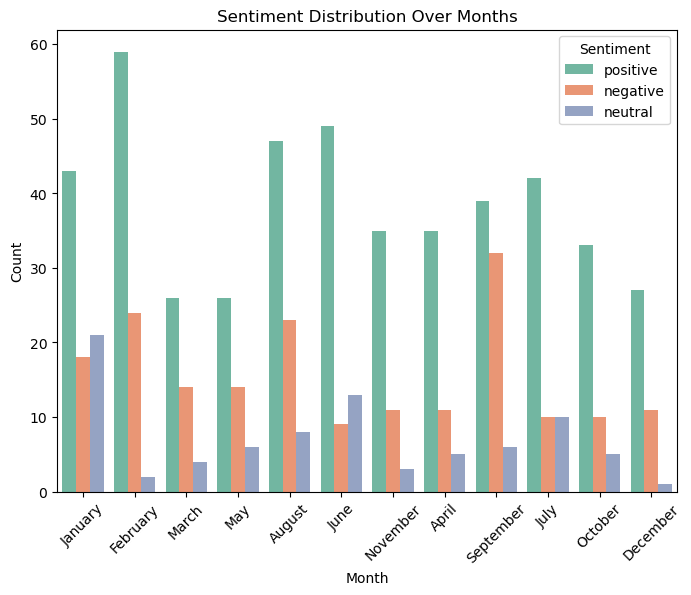

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Set2')  
plt.title('Sentiment Distribution Over Months') 
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

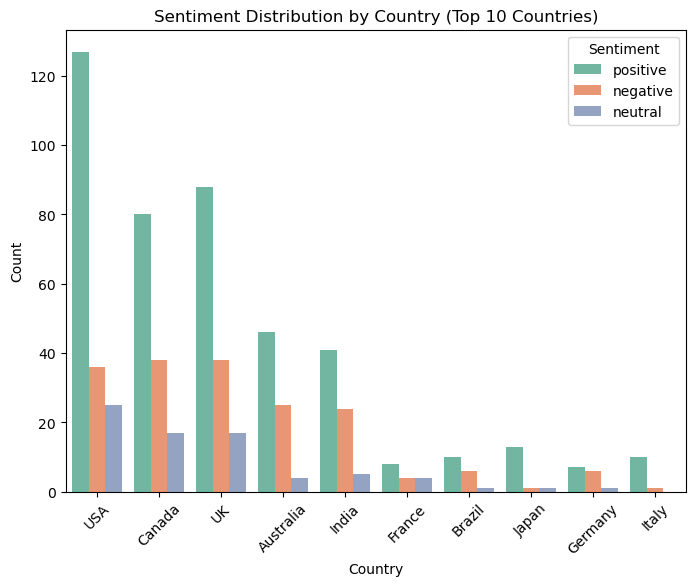

In [62]:
top_10_countries = df1['Country'].value_counts().sort_values(ascending=False).head(10).index
top_10_df = df1[df1['Country'].isin(top_10_countries)]
plt.figure(figsize=(8, 6))
sns.countplot(x='Country', hue='Sentiment', data=top_10_df, palette='Set2')  
plt.title('Sentiment Distribution by Country (Top 10 Countries)') 
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

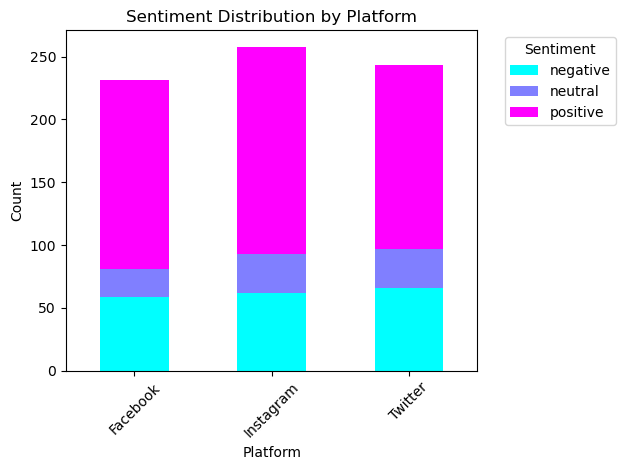

In [63]:
platform_sentiment_counts = df1.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
platform_sentiment_counts.plot(kind='bar', stacked=True, colormap= plt.get_cmap('cool'), edgecolor='none')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [64]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(15), columns=['Common_words', 'count'])

In [65]:
top_words_df

,Common_words,count
0,new,43
1,life,37
2,like,27
3,day,26
4,feeling,26
5,heart,26
6,dreams,25
7,laughter,24
8,night,23
9,joy,23


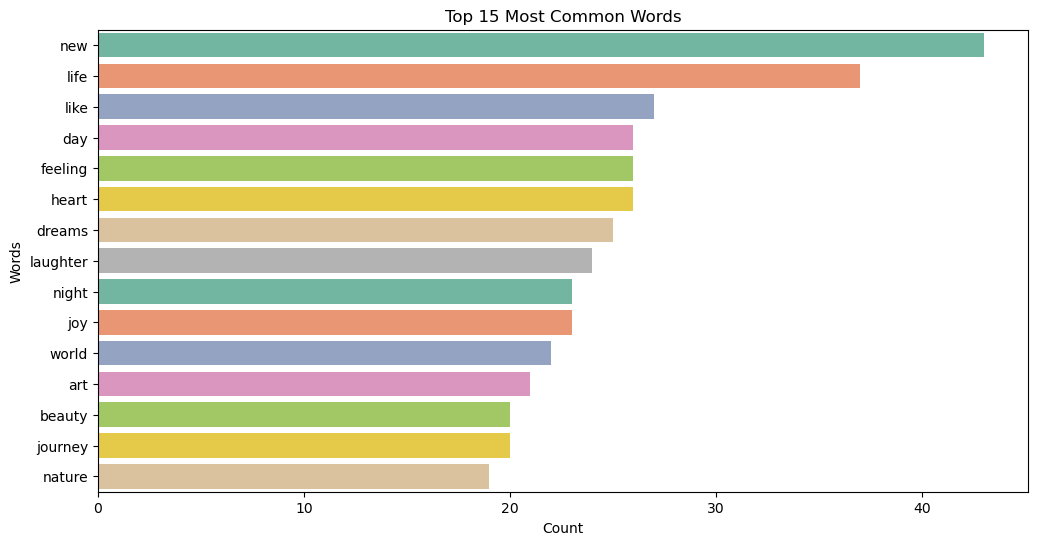

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='Common_words', data=top_words_df, palette='Set2')
plt.title('Top 15 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

In [67]:
positive_sentiment = df1[df1['Sentiment'] == 'positive']
negative_sentiment = df1[df1['Sentiment'] == 'negative']
neutral_sentiment = df1[df1['Sentiment'] == 'neutral']

#### Positive Sentiments

In [69]:
positive_word_counts = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
top_positive_words_df = pd.DataFrame(positive_word_counts.most_common(10), columns=['Common_words', 'count'])

In [70]:
top_positive_words_df

,Common_words,count
0,new,29
1,laughter,24
2,life,22
3,joy,22
4,beauty,20
5,feeling,17
6,nature,16
7,sky,16
8,dreams,16
9,art,16


#### Negative Sentiments

In [72]:
negative_word_counts = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
top_negative_words_df = pd.DataFrame(negative_word_counts.most_common(10), columns=['Common_words', 'count'])

In [73]:
top_negative_words_df

,Common_words,count
0,shattered,14
1,despair,12
2,like,12
3,life,11
4,heart,11
5,emotions,11
6,lost,11
7,day,10
8,feeling,9
9,loneliness,9


#### Neutral Sentiments

In [75]:
neutral_word_counts = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
top_neutral_words_df = pd.DataFrame(neutral_word_counts.most_common(10), columns=['Common_words', 'count'])

In [76]:
top_neutral_words_df

,Common_words,count
0,new,14
1,journey,7
2,night,7
3,exploring,6
4,trying,5
5,day,5
6,concert,5
7,nostalgia,5
8,every,5
9,attending,4


## Model Selection

In [78]:
X = df1['Clean_Text'].values
y = df1['Sentiment'].values

#### Separate Train and Test Data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### TF-IDF Vectorization

In [82]:
vectorizer = TfidfVectorizer(max_features=5000)  #Transforming Text Data into TF-IDF Features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#### Passive Aggressive Classifier

In [84]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [85]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [86]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.8299319727891157
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85        39
     neutral       0.44      0.29      0.35        14
    positive       0.86      0.90      0.88        94

    accuracy                           0.83       147
   macro avg       0.72      0.68      0.69       147
weighted avg       0.82      0.83      0.82       147



#### Logistic Classifier

In [88]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [89]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [90]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.7687074829931972
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.51      0.66        39
     neutral       0.00      0.00      0.00        14
    positive       0.74      0.99      0.85        94

    accuracy                           0.77       147
   macro avg       0.55      0.50      0.50       147
weighted avg       0.72      0.77      0.72       147



#### Random Forest Classifier

In [92]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [94]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.782312925170068
Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.56      0.69        39
     neutral       1.00      0.07      0.13        14
    positive       0.76      0.98      0.86        94

    accuracy                           0.78       147
   macro avg       0.88      0.54      0.56       147
weighted avg       0.81      0.78      0.74       147



#### SVM Classifier

In [96]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [97]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [98]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.7210884353741497
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.31      0.46        39
     neutral       0.00      0.00      0.00        14
    positive       0.70      1.00      0.82        94

    accuracy                           0.72       147
   macro avg       0.54      0.44      0.43       147
weighted avg       0.69      0.72      0.65       147



#### Multinomial NB

In [100]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [101]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [102]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.7687074829931972
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.51      0.66        39
     neutral       0.00      0.00      0.00        14
    positive       0.74      0.99      0.85        94

    accuracy                           0.77       147
   macro avg       0.55      0.50      0.50       147
weighted avg       0.72      0.77      0.72       147



The Passive Aggressive Classifier has achieved the highest accuracy of **0.83**. This indicates that the model is highly effective in balancing precision and recall, making it a robust choice for our sentiment analysis task.

### Hyperparameters

In [105]:
param_dist = {'C': [0.1, 0.5, 1.0],'fit_intercept': [True, False],'shuffle': [True, False],'verbose': [0, 1],}

In [106]:
pac_classifier = PassiveAggressiveClassifier(random_state=42)
randomized_search = RandomizedSearchCV(pac_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

-- Epoch 1
Norm: 10.60, NNZs: 1839, Bias: -0.462563, T: 468, Avg. loss: 0.612609
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 15.03, NNZs: 1874, Bias: -0.341558, T: 936, Avg. loss: 0.221457
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 16.66, NNZs: 1875, Bias: -0.299096, T: 1404, Avg. loss: 0.074892
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 17.17, NNZs: 1875, Bias: -0.294500, T: 1872, Avg. loss: 0.023616
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 17.38, NNZs: 1875, Bias: -0.297071, T: 2340, Avg. loss: 0.008882
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 17.46, NNZs: 1875, Bias: -0.299380, T: 2808, Avg. loss: 0.003413
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 17.49, NNZs: 1875, Bias: -0.301243, T: 3276, Avg. loss: 0.001270
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 17.50, NNZs: 1875, Bias: -0.301311, T: 3744, Avg. loss: 0.000371
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 17.50, NNZs: 1875, Bias: -0.301257, T: 4212, Avg.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=PassiveAggressiveClassifier(random_state=42),
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'fit_intercept': [True, False],
                                        'shuffle': [True, False],
                                        'verbose': [0, 1]},
                   random_state=42, scoring='accuracy')

In [107]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}

In [108]:
best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)
best_pac_classifier_randomized.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42, shuffle=False)

In [109]:
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

In [110]:
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)

In [111]:
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)

Best PassiveAggressiveClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}
Accuracy: 0.8367346938775511
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.85      0.86        39
     neutral       0.44      0.29      0.35        14
    positive       0.86      0.91      0.89        94

    accuracy                           0.84       147
   macro avg       0.72      0.68      0.70       147
weighted avg       0.82      0.84      0.83       147



The optimization of hyperparameters for the Passive Aggressive Classifier using RandomizedSearchCV resulted in an impressive accuracy of approximately **0.84**.

In [113]:
print("Confusion Matrix for the Best Passive Aggressive Classifier Model")
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)
conf_matrix_test 

Confusion Matrix for the Best Passive Aggressive Classifier Model


array([[33,  1,  5],
       [ 1,  4,  9],
       [ 4,  4, 86]], dtype=int64)

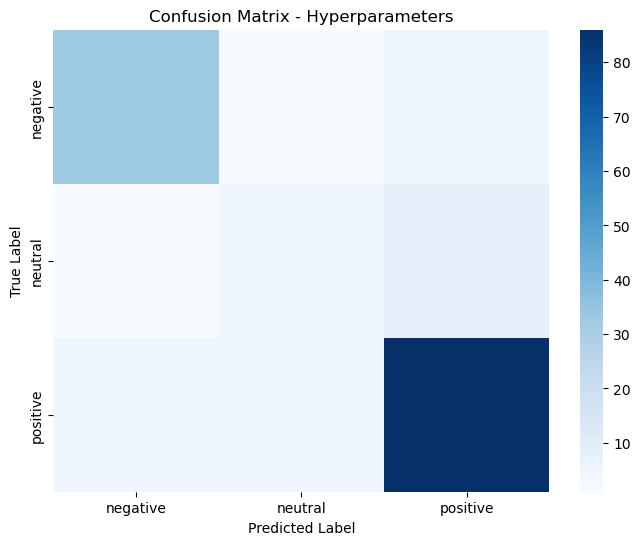

In [114]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()